In [1]:
import warnings

# sklearn의 n_init 관련 FutureWarning 무시
warnings.filterwarnings('ignore', message="The default value of `n_init` will change from 10 to 'auto'")

# seaborn의 use_inf_as_na 관련 FutureWarning 무시
warnings.filterwarnings('ignore', message="use_inf_as_na option is deprecated")


# PCA

In [3]:
import pandas as pd

user = pd.read_csv(r'C:\Users\user\Downloads\custom_data.csv')
user.head(10)


,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3
5,16,56,1,716,22,3
6,34,52,1,590,21,2
7,32,38,1,169,10,3
8,19,49,1,46,6,3
9,68,73,2,49,2,4


### k-means로 분석한 6차원의 데이터의 inertia를 시각화한 그래프

<Axes: >

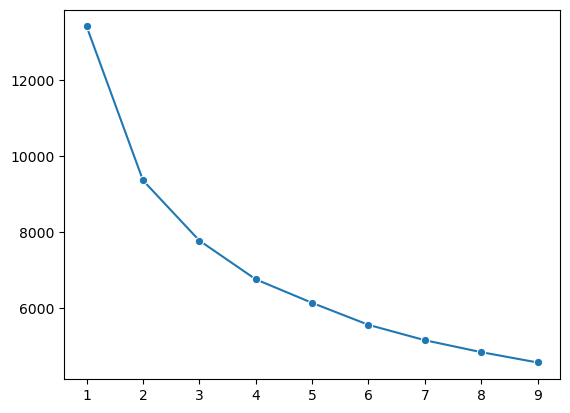

In [5]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()    # 각 컬럼의 표준편차
scaled_df = (user - user_mean)/user_std  # 컬럼별 표준화 진행 

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')


### PCA로 차원을 줄여 분석한 2차원의 데이터의 inertia를 시각화한 그래프

<Axes: >

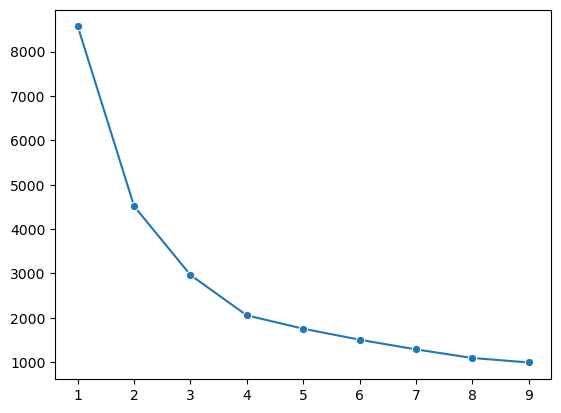

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  #n_components : 유지할 차원의 갯수

# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

# 클러스터링
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

# 시각화
sns.lineplot(x=ks, y=inertias, marker='o')

### PCA 실습

In [9]:
from sklearn.decomposition import PCA

# 모델 생성
pca = PCA(n_components=2)

In [10]:
pca.fit(scaled_df)  # PCA 학습
scaled_df_pca = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pca)  # 데이터프레임으로 변환

pca_df.columns = ['PC1', 'PC2']  # 데이터프레임 컬럼 이름 지정

pca_df.head()


,PC1,PC2
0,-3.043476,0.646301
1,1.926976,0.528713
2,-1.501383,-0.117994
3,1.168100,-1.373146
4,0.226542,-0.077045


<Axes: xlabel='PC1', ylabel='PC2'>

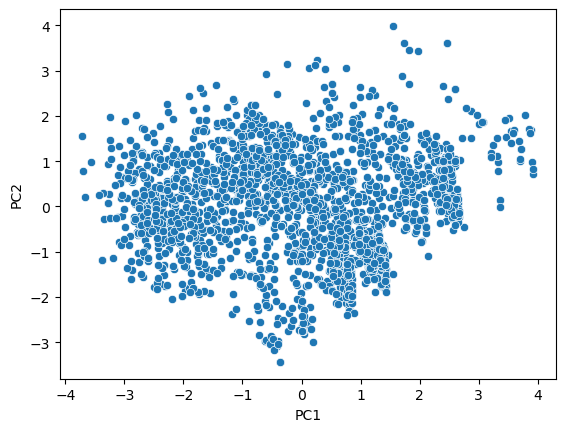

In [11]:
sns.scatterplot(data=pca_df, x ='PC1', y='PC2')

In [12]:
num_components = len(pca.explained_variance_ratio_)
num_components

2